<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Student_ID  100 non-null    int64 
 1   Rating      100 non-null    int64 
 2   Feedback    100 non-null    object
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


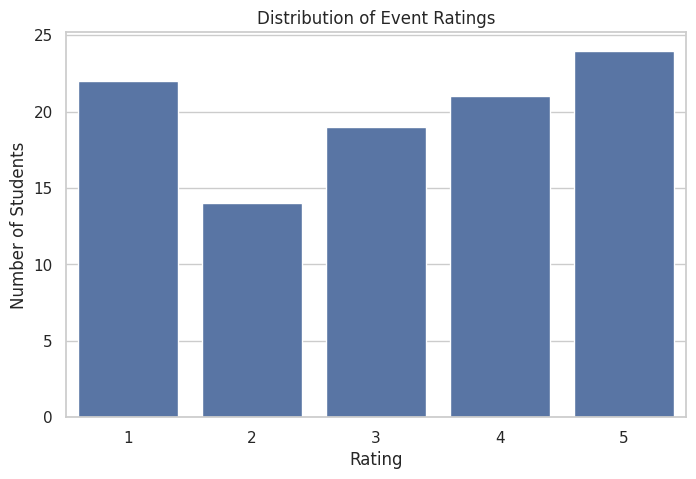

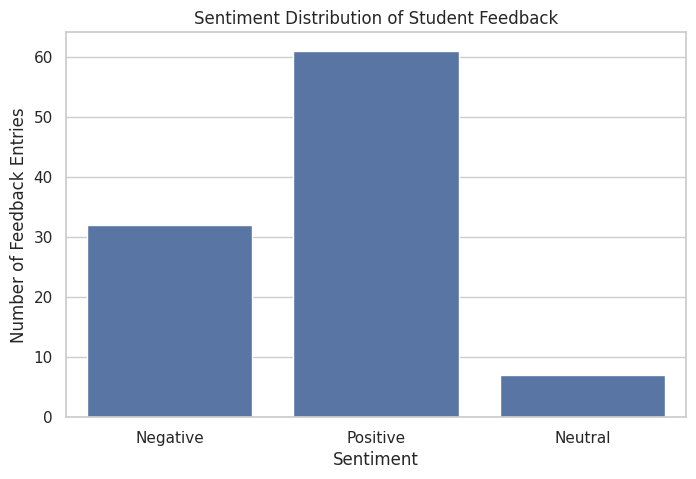

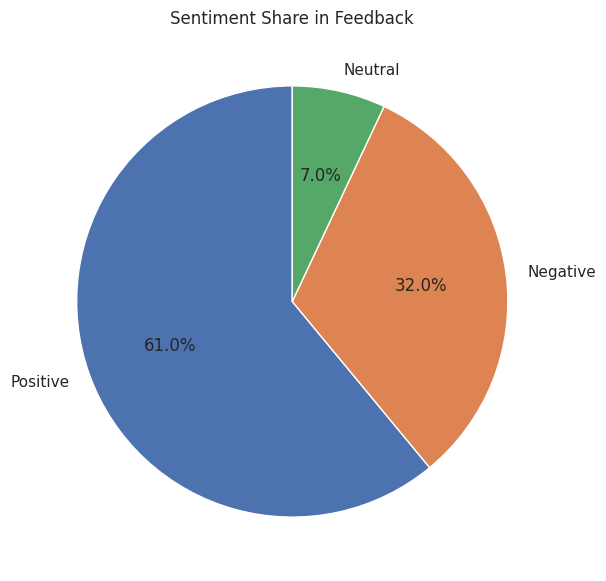

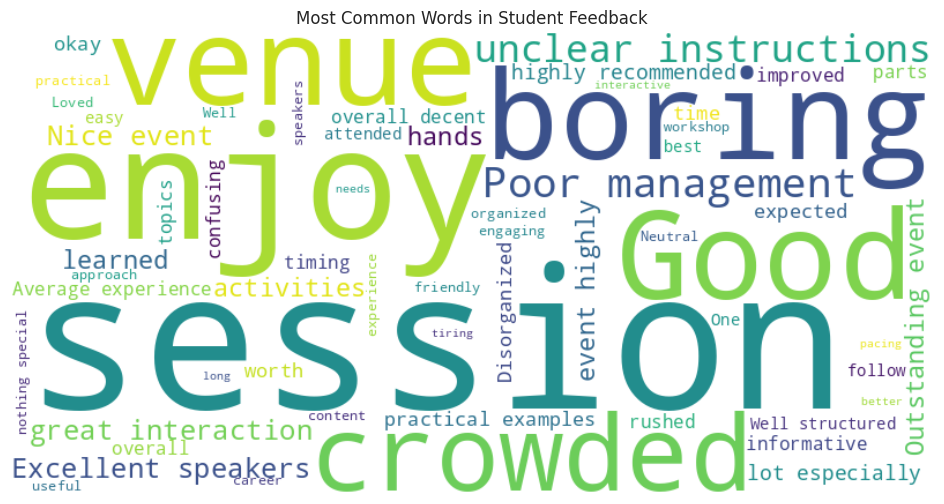

In [16]:
#This dataset was synthetically generated to demonstrate data cleaning, sentiment analysis, and visualization techniques for educational purposes.
# ============================================
# Student Event Feedback Analysis (NLP Project)
# ============================================

# This notebook demonstrates:
# 1. Data cleaning & preparation using pandas
# 2. Sentiment analysis using TextBlob
# 3. Data visualization (bar chart, pie chart, word cloud)
# 4. Interpretation of feedback for decision-making

# --------------------------------------------
# 1. Import Required Libraries
# --------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
from wordcloud import WordCloud

# Set plot style for better visuals
sns.set(style="whitegrid")

# --------------------------------------------
# 2. Load the Dataset
# --------------------------------------------

# NOTE:
# This dataset is synthetically generated for educational purposes
# to demonstrate data analysis and NLP techniques.

df = pd.read_csv("student_event_feedback.csv")

# Preview the dataset
df.head()

# --------------------------------------------
# 3. Basic Data Inspection
# --------------------------------------------

# Dataset structure and data types
df.info()

# Check for missing values
df.isnull().sum()

# Since this is a clean synthetic dataset, no missing values are present.
# If missing values existed, we would handle them here.

# --------------------------------------------
# 4. Rating Analysis (Quantitative Analysis)
# --------------------------------------------

plt.figure(figsize=(8, 5))
sns.countplot(x="Rating", data=df)
plt.title("Distribution of Event Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Students")
plt.show()

# --------------------------------------------
# 5. Sentiment Analysis on Feedback Text
# --------------------------------------------

# Function to calculate sentiment polarity using TextBlob
def get_sentiment_score(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
df["Sentiment_Score"] = df["Feedback"].apply(get_sentiment_score)

# Function to label sentiment based on polarity score
def label_sentiment(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

# Create sentiment labels
df["Sentiment_Label"] = df["Sentiment_Score"].apply(label_sentiment)

# Preview sentiment results
df.head()

# --------------------------------------------
# 6. Sentiment Distribution Visualization
# --------------------------------------------

# Bar chart for sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="Sentiment_Label", data=df)
plt.title("Sentiment Distribution of Student Feedback")
plt.xlabel("Sentiment")
plt.ylabel("Number of Feedback Entries")
plt.show()

# Pie chart for sentiment proportion
plt.figure(figsize=(7, 7))
df["Sentiment_Label"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Sentiment Share in Feedback")
plt.ylabel("")
plt.show()

# --------------------------------------------
# 7. Word Cloud from Feedback Text
# --------------------------------------------

# Combine all feedback text into one string
all_feedback_text = " ".join(df["Feedback"])

# Generate word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white"
).generate(all_feedback_text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Student Feedback")
plt.show()

# --------------------------------------------
# 8. Summary Insights (for Markdown Section)
# --------------------------------------------

# Example insights you should WRITE in markdown (not code):
#
# - Majority of student feedback shows positive sentiment,
#   indicating overall satisfaction with the event.
# - Negative feedback highlights issues related to organization,
#   pacing, and session length.
# - Word cloud shows frequent terms such as 'informative',
#   'interactive', and 'organized', suggesting strengths.
#
# Recommendations:
# - Improve event scheduling and time management
# - Increase interactive and hands-on activities
# - Address organizational issues highlighted in negative feedback

# ============================================
# END OF NOTEBOOK
# ============================================
